# DATA MINING COURSEWORK: Adaptative DNA Sequence Tokenization

## 1. Loading the data

In our case the corpus data used will be a sequence of DNA collected from NCBI. The easiest genomic sequence to work with is the mithocondrial human genome, which accounts for 16569 base pairs. This has its identifier in the NCBI website as NC_012920.1 and it has to be downloaded in the format FASTA. The format FASTA represents the nucleotides of the coding strand from the DNA. The first step is to download the sequence and the libraries that will be used during the project.

In [ ]:
# Installing the needed libraries
# !pip install Biopython
# !pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [11]:
# Importing needed libraries
import matplotlib.pyplot as plt
from Bio import SeqIO
from Bio.Seq import Seq
import numpy as np
import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torch import optim
import torch.nn.functional as F
import seaborn as sns
import os
# import torch
# import torch.nn as nn
# from torch.utils.data import DataLoader

In [12]:
# Getting to the datasets files
current_repository = os.getcwd()
print("The current repository is:", current_repository)

dataset_path = os.path.join(current_repository, "FASTA Files")

# Code inspired from  https://www.youtube.com/watch?v=6ooufZEVRUk Reading Fasta files
# Putting the name of the file
filename = os.path.join(dataset_path, "humanmitocondrial.fasta")
# Reading the sequence
mitocondrial_DNA = SeqIO.read(filename, "fasta")
# Showing the type of the sequence
print(type(mitocondrial_DNA))
# Printing the ID it holds in NCBI
print(mitocondrial_DNA.id)
# Printing the name of the sequence
print(mitocondrial_DNA.name)
# Printing the description of the sequence
print(mitocondrial_DNA.description)
# Printing the length of the full sequence
print("The length of the coding strand is",len(mitocondrial_DNA.seq), "nucleotides.")

The current repository is: c:\Users\Pablo\Desktop\Portfolio\Data_Science_Portfolio_Pablo_Martinez\DNA_BERT_tokenization
<class 'Bio.SeqRecord.SeqRecord'>
NC_012920.1
NC_012920.1
NC_012920.1 Homo sapiens mitochondrion, complete genome
The length of the coding strand is 16569 nucleotides.


## 2. Reviewing the conventional tokenization methods used for DNA

Conventional methods of tokenization of DNA use Natural Language Processing (NLP) methods that are currently used in linguistic approaches. The main problem of applying these is that Genomics are not as predictable from the human being perspective than linguistics. Genomics is not really an understandable field when it comes to understand and depict the underlying patterns found in the genomic sequences. For that reason, conventional approaches are not suitable and the properties that these sequences have must be introduced somehow.

The most simple techinques used are single, k-mer and byte pair encoding (BPE) tokenizations.

### a. Single Tokenization

In [13]:
def single_tokenizer(sequence):
    '''This function only tokenizes character by character the DNA sequences'''
    # Spliting all the tokens
    tokens = list(sequence)
    # Creating counts for every token
    counts = {} # empty diccionary for the tokens
    for val in tokens: # goinf through all the values in the tokens
        if val not in counts:
            # in case there is no counts for the token initialize
            counts[val] = 1
        else:
            # add 1 unit otherwise for each new value of the same token value
            counts[val] += 1
    return tokens, counts

mito_DNA = single_tokenizer(mitocondrial_DNA.seq)

There is one anomalie in terms of one nucleotide which is depicted as N according to the dictionnary result and this is not possible

In [14]:
# Finding the wrong nucleotide "N"
index = np.where(np.array(mito_DNA[0]) == "N")[0][0]
# converting the sequence to list
seq_list = list(mitocondrial_DNA.seq)
# Removing the value which is incorrect
seq_list.pop(index)
# reconverting to a string the value
corrected_seq = str("".join(seq_list))

In [6]:
corrected_seq

'GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCATTTGGTATTTTCGTCTGGGGGGTATGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTATGTCGCAGTATCTGTCTTTGATTCCTGCCTCATCCTATTATTTATCGCACCTACGTTCAATATTACAGGCGAACATACTTACTAAAGTGTGTTAATTAATTAATGCTTGTAGGACATAATAATAACAATTGAATGTCTGCACAGCCACTTTCCACACAGACATCATAACAAAAAATTTCCACCAAACCCCCCCTCCCCCGCTTCTGGCCACAGCACTTAAACACATCTCTGCCAAACCCCAAAAACAAAGAACCCTAACACCAGCCTAACCAGATTTCAAATTTTATCTTTTGGCGGTATGCACTTTTAACAGTCACCCCCCAACTAACACATTATTTTCCCCTCCCACTCCCATACTACTAATCTCATCAATACAACCCCCGCCCATCCTACCCAGCACACACACACCGCTGCTAACCCCATACCCCGAACCAACCAAACCCCAAAGACACCCCCCACAGTTTATGTAGCTTACCTCCTCAAAGCAATACACTGAAAATGTTTAGACGGGCTCACATCACCCCATAAACAAATAGGTTTGGTCCTAGCCTTTCTATTAGCTCTTAGTAAGATTACACATGCAAGCATCCCCGTTCCAGTGAGTTCACCCTCTAAATCACCACGATCAAAAGGAACAAGCATCAAGCACGCAGCAATGCAGCTCAAAACGCTTAGCCTAGCCACACCCCCACGGGAAACAGCAGTGATTAACCTTTAGCAATAAACGAAAGTTTAACTAAGCTATACTAACCCCAGGGTTGGTCAATTTCGTGCCAGCCACCGCGGTCACACGATTAACCCAAGTCAATAGAAGCCGGCGTAAAGAGTGTTTTAGATCACCCCCTCCCCAATAAAGCTAAAACTCACCTGAGTTGTAAAAAAC

In [15]:
# Applying the function to the restored sequence
single_DNA = single_tokenizer(corrected_seq)
# Showing the results corrected
single_DNA
# Storing the size of the vocabulary
single_size = 4

### b. K-mer tokenizer

It consists in spreading the sequences in tokens of length k.

In [16]:
def kmer_tokenizer(sequence, k):
    '''This function aims to produce tokens of length k from the DNA sequence'''
    tokens = [] # creating an empty list to store the tokens
        # Creating counts for every token
    counts = {} # empty diccionary for the token
    for i in range(len(sequence)-k + 1): # runing for the whole length of the sequence
        token = sequence[i:i+k] # taking the k values after the index val
        tokens.append(token) # appendinng the values to the list
        if token not in counts:
            # in case there is no counts for the token initialize
            counts[token] = 1
        else:
            # add 1 unit otherwise for each new value of the same token value
            counts[token] += 1
    return (tokens, counts)

# The most meaningnful sequences are the ones with a value of k between 3 and 6
mer3 = kmer_tokenizer(corrected_seq, 3)
mer4 = kmer_tokenizer(corrected_seq, 4)
mer5 = kmer_tokenizer(corrected_seq, 5)
mer6 = kmer_tokenizer(corrected_seq, 6)

In [17]:
# Storing the sizes of the vocabularies generated by the k-mers
mer3_size = len(mer3[1])
mer4_size = len(mer4[1])
mer5_size = len(mer5[1])
mer6_size = len(mer6[1])

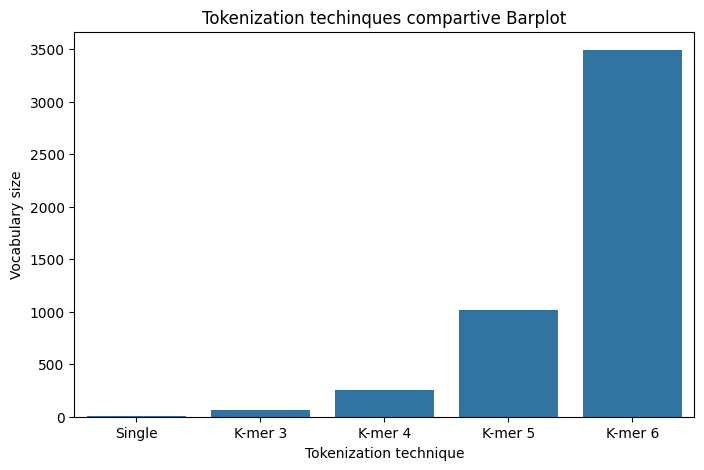

In [18]:
# Visualization of the differences between the vocabulary size for the different methods

# Defining the different vocabulary sizes and labels for each one
sizes = [single_size, mer3_size, mer4_size, mer5_size, mer6_size]
labels = ["Single", "K-mer 3", "K-mer 4", "K-mer 5", "K-mer 6"]

# Plotting the vocabulary size as a function of the tokenization technique employed
plt.figure(figsize = (8, 5))
sns.barplot( x = labels, y = sizes)
plt.title("Tokenization techinques compartive Barplot")
plt.xlabel("Tokenization technique")
plt.ylabel("Vocabulary size")
plt.show()

### c. Byte Pair Encoding (BPE)

This algorithm is more complex than the previously mentioned (https://huggingface.co/learn/llm-course/chapter6/5):

1. Spliting all the corpus into unitary data (single nucleotides)

2. Pairing up one after each other the tokens

3. Counting the frequencies of each pair and selecting the one which appears more often

4. Adding the pair to the initial token list and repeat the process until the size of the vocabulary is the desired

In [13]:
initial_vocab = single_tokenizer(corrected_seq)[0] # initialize the tokenizer
N = 20 # this will be the size of our vocabulary at first

# Introducing a Node class to avoid the tuples inside the dictionary
class DictNode:

    def __init__(self, index):
        '''Initializing the class with the first index'''
        self.indexes = [index] # storing the 1st indexes
        self.count = 1 # initializing the counts

    def addition(self, new_index):
        self.indexes.append(new_index) # appending to the indices list the new indexes
        self.count += 1 # adding a new unit for every new index

def BPE(vocab, iterations):
    '''This function stores a vocabulary of tokens which keeps icreasing with the most
    frequent pairs until the size of the vocabulary desired is reached.'''
    freqs = {} # initializing the dictionary for the frequencies and indexes
    for _ in range(iterations): # running for the size of the vocabulary
        for j in range(len(vocab)-1): # running through all the values in the vocabulary to create new pairs
            token = vocab[j] + vocab[j+1] # taking the pairs
            if token not in freqs: # if the token is not in the vocabulary
                freqs[token] = DictNode(j) # then initialize the token
            else:
                freqs[token].addition(j) # add count to the token if it is not in the vocabulary previously
        if not freqs:
            break # break in case there is nothing in the dictionary

        max_freq = max(freqs.items(), key = lambda x: x[1].count)[0] # taking the key (token) with the maximum value associated
        counter = 0 # initializing the counter
        while counter < len(vocab)-1: # for all the values in the vocabulary
            if vocab[counter] + vocab[counter+1] == max_freq: # if the value of the pair is equal to the maximum value
                vocab[counter] = max_freq # replacing the pair by the maximum freq value
                del vocab[counter+1] # deleting the other value of the pair
            else:
                counter += 1 # increasing the counter
    return vocab

In [11]:
# Trying the BPE for 1000 iterations
BPE(initial_vocab, 1000)

['GAT',
 'CACA',
 'GG',
 'TCTA',
 'TCACC',
 'CTA',
 'TTAA',
 'CCA',
 'CTCA',
 'CGG',
 'GA',
 'GCT',
 'CTCC',
 'AT',
 'GCA',
 'TT',
 'TGG',
 'TATT',
 'TT',
 'CG',
 'TCT',
 'GG',
 'GG',
 'GG',
 'TATG',
 'CA',
 'CG',
 'CGA',
 'TAG',
 'CATT',
 'G',
 'CGA',
 'GACG',
 'CTG',
 'GAGCC',
 'GGA',
 'GCA',
 'CCCTA',
 'TG',
 'TCG',
 'CAG',
 'TA',
 'TCT',
 'GTCT',
 'TT',
 'GATT',
 'CCTG',
 'CCTCA',
 'TCCTA',
 'TTA',
 'TTTA',
 'TC',
 'GCA',
 'CCTA',
 'CG',
 'TTCAA',
 'TATTA',
 'CAGG',
 'CGAA',
 'CA',
 'TACT',
 'TACT',
 'AAAG',
 'TG',
 'TG',
 'TTAA',
 'TTAA',
 'TTAA',
 'TGCT',
 'TG',
 'TAG',
 'GA',
 'CATAA',
 'TAA',
 'TAA',
 'CAA',
 'TT',
 'GAA',
 'TG',
 'TCT',
 'GCA',
 'CA',
 'GCCA',
 'CTTT',
 'CCA',
 'CACA',
 'GA',
 'CATCA',
 'TAA',
 'CAA',
 'AAAA',
 'TT',
 'TCC',
 'ACC',
 'AAA',
 'CCCC',
 'CCCT',
 'CCCC',
 'CG',
 'CT',
 'TCT',
 'GG',
 'CCA',
 'CAG',
 'CACT',
 'TAAA',
 'CACA',
 'TCT',
 'CT',
 'GCC',
 'AAA',
 'CCCC',
 'AA',
 'AAA',
 'CAAA',
 'GAA',
 'CC',
 'CTAA',
 'CA',
 'CCA',
 'GCC',
 'TAA',
 'CCA

After exploring these different tokenization techniques, the most convenient is suposed to be k-mer, for the flexibility it provides when it comes to split the bases into different formats.

### 3.Building the DNA BERT model

#### a. Dataset Creation

As there is not a standard dataset organized for the classification problem faced, a dataset from 0 can be created with different gene sequences that are short enough to be processed and presenting coding sequences and consequently promoter sites and fragments.

In [19]:
def create_labels(sequence, promoter_ids):
    '''This function includes the labels to the sequences depending on wether they are
    making part of the promoter or not. For the positions in the strand where there is
    promoter, the 100s positions upstream (going backwards) are also considered to be promoters.'''
    ids_list = np.zeros(len(sequence), dtype = int) # creating a list with the same dimension than the sequence introduced
    for value in promoter_ids: # searching for the values of the possible promoters
        if value > 100: # the value is not at the begining
            ids_list[value-100:value] = 1 # 100s previous values as promoters
        else: # value is at the begining
            ids_list[0:value] = 1 # everything until the value is promoter labeled
    ids_list = list(ids_list) # converting the numpy object to a list
    return ids_list


class Dataset_DNA:
    def __init__(self, sequence, tokenizer, ids, k):
        '''This function initializes a dataset to be included in the BERT algorithm'''
        self.sequences = sequence # creating a sequences object
        self.tokenizer = tokenizer # defining the type of tokenizer employed
        self.labels = create_labels(sequence, ids) # setting the initial labels for the first sequence
        self.k = k # This implements the number of elements in k-mers

    def add_genome(self,sequence, ids):
        '''Function to add the new genome sequences to the dataset'''
        self.sequences += sequence # adding the sequence to all the fragments
        self.labels += create_labels(sequence, ids) # adding the labels

    def get_tokens(self):
        '''Functions associating creating the tokens with the chosen tokenizer.'''
        tokens, _ = self.tokenizer(self.sequences, self.k) # tokenizing sequences
        return tokens

    def get_labels(self, tokens, k=6):
        '''Function that creates the final labels to put them'''
        final_labels = [] # empty list for the labels
        for i in range(len(tokens)): # going through all the labels of individual nucleotides
            if 1 in self.labels[i:i+k]: # going through the k values in the token
                final_labels.append(1) # storing 1 for the promoter site indicator
            else:
                final_labels.append(0) # storing 0 for the promoter site
        return torch.tensor(final_labels) # returning the tensor value

    def get_vocabulary(self, tokens):
        '''Function made to create a vocabulary for the tensors
        structure in the BERT analysis through pytorch.'''
        global_vocab = sorted(set(tokens)) # getting all the tokens possibilities in alphabetical order
        tokens_ids = [] # empty list for the tokens identifiers
        for tok in tokens: # going through all the tokens
            position = global_vocab.index(tok) # taking the position in the vocabulary from the tokens
            tokens_ids.append(position) # storing the indexes
        return torch.tensor(tokens_ids) # converting to a tensor

    def get_vocab_size(self, tokens):
        '''Function that returns the total number of possible
        tokens.'''
        return len(set(tokens)) # returning the vocabulary length



Once the dataset structure is created, it is time to fill it with genome sequences that have coding regions to add the promoters sites. The promoter sites are extracted from analysis in the DTU algorithm of looking for promoter sites introducing the FASTA files.  


In [20]:
# These are all the genome fasta files with the corresponding promoter positions used to build the dataset
gene_positions = {
    "humanglobin.fasta": [
        2100, 3800, 4600, 5100, 6100, 6700, 7100, 7500, 8300, 9700, 10400, 10900,
        11300, 14800, 16300, 17000, 18900, 19600, 20200, 21600, 23500, 25400,
        26800, 27600, 29200, 29800, 30400, 31700, 33900, 34600, 35000, 35900,
        36400, 37100, 39500, 40000, 40800, 41300, 42000, 45300, 45800, 46900,
        49500, 50900, 51400, 52600, 53600, 55000, 56800, 58100, 59000, 61900,
        62300, 64000, 65500, 67200, 67800, 68700, 71700
    ],
    "humanmitocondrial.fasta": [
        300, 3800, 5200, 6000, 7200, 8200, 9600, 11200, 11700, 15200
    ],
    "C12orf24.fasta": [800],
    "C7orf25.fasta": [400],
    "C1orf198.fasta": [200],
    "C22orf23.fasta": [200],
    "leukosialin.fasta": [1600, 2800, 4400],
    "TMEM17.fasta": [200, 700],
    "TMEM184B.fasta": [200, 700],
    "TMEM25.fasta": [300],
    "TMEM33.fasta": [200],
    "TMEM35A.fasta": [1600],
    "TMEM38A.fasta": [200],
    "TMEM38B.fasta": [700],
    "TMEM39A.fasta": [500],
    "TMEM39B.fasta": [200, 600],
    "TMEM40.fasta": [200],
    "TMEM41A.fasta": [200]
}


In [21]:
# Creating the dataset including all the genes:
for key in gene_positions.keys():
    # getting the diccionary started with the first genome
    if key == "humanglobin.fasta":
        initial_dataset = Dataset_DNA(str(SeqIO.read(os.path.join(dataset_path, key), "fasta").seq), kmer_tokenizer, gene_positions["humanglobin.fasta"], 6)
    else: # adding the otherr genomes and positions
        initial_dataset.add_genome(str(SeqIO.read(os.path.join(dataset_path, key), "fasta").seq), gene_positions[key])

total_tokens = list(initial_dataset.get_tokens()) # Creating the tokens
tensor_labels = initial_dataset.get_labels(total_tokens, 6) # Assessing the labels in a tensor format
tensor_ids_tokens = initial_dataset.get_vocabulary(total_tokens) # Getting the token ids in a tensor format
vocab_size = initial_dataset.get_vocab_size(total_tokens)



It is necessary to understand that the number of tokens is very large. In fact, it is too computationally expensive to work with BERT. That is the reason why it is more interesting to divide the created tensors in chunks.

In [42]:
def make_chunks(ids, labels, chunk_size, overlap_size):
    '''Function making subsets of the tensors to reduce the
    computational cost in the DNA BERT '''
    # empty lists to create the chunks
    chunks_ids = []
    chunks_labels = []
    # Going through all the sequences sequetially with steps of overlap_size
    for i in range(0, len(ids)-chunk_size+1, overlap_size):
        # Filling the lists with the subsets of the tensors of ids and labels
        id_chunk = ids[i:i+chunk_size]
        label_chunk = labels[i:i+chunk_size]
        chunks_ids.append(id_chunk)
        chunks_labels.append(label_chunk)

    return chunks_ids, chunks_labels

chunked_data = make_chunks(tensor_ids_tokens, tensor_labels, 512, 128)

The final dataset is created to be adapted to work with the pytorch requirements:

In [43]:
class DNABERT_dataset(Dataset):
    def __init__(self, chunks):
        '''Initialization of the compatible dataset with Pytorch
        with the labels and the tokens identifiers.'''
        self.ids = chunks[0] # tokens identifiers
        self.labels = chunks[1] # labels

    def __len__(self):
        '''Function that computes the length of the dataset'''
        return len(self.ids)


    def __getitem__(self, index):
        '''Function built to get points from the dataset'''
        return {
            "ids": self.ids[index],
            "labels": self.labels[index]
        }

#### b. Data Splitting and Loading

In [44]:
main_dataset = DNABERT_dataset(chunked_data) # creating the dataset
# Defining the training and test sizes
training_size = int(0.8*len(main_dataset))
test_size = len(main_dataset) - training_size
# Spliting the dataset
train_data, test_data = random_split(main_dataset, [training_size, test_size])

#### c. DNABERT classifier

In [45]:
class DNABERT(nn.Module):

    def __init__(self, size_vocabulary, embedding_dim, max_len, n_heads, n_layers, n_classes, dropout = 0.1):
        ''' Function initializing the parameters and methods used in the DNA BERT model. '''
        super(DNABERT, self).__init__() # accessing to all the content in nn.Module
        self.token_embedding = nn.Embedding(size_vocabulary, embedding_dim) # creating token embedding
        self.position_embedding = nn.Embedding(max_len, embedding_dim) # creating poition embedding
        self.segment_embedding = nn.Embedding(2, embedding_dim) # creating the segment embedding
        self.dropout = nn.Dropout(dropout) # dropout regularization to prevent overfitting
        self.norm= nn.LayerNorm(embedding_dim) # normalization of the embedding layer
        # Defining a single encoder transformer with multi-head attention
        encoder_layer = nn.TransformerEncoderLayer(d_model = embedding_dim,
                                                   nhead= n_heads,
                                                   dropout= dropout,
                                                   batch_first = True)
        # Stacking the Transformer layers forming the full encoder
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers = n_layers)
        # Mapping the outputs to the classes (0 or 1)
        self.classifier = nn.Linear(embedding_dim, n_classes)

    def forward(self, ids, labels):
        ''' Function to produce classification predictions from the inputs'''
        # Getting the sequence length and the input tensor for the batch size
        seq_len = ids.size(1)
        batch_size = ids.size(0)
        # Creation of IDs for the sequences in the batch
        position_ids = torch.arange(seq_len, dtype=torch.long, device=ids.device)
        position_ids = position_ids.unsqueeze(0).expand(batch_size, seq_len)
        # Getting the different embeddings
        tok_emb = self.token_embedding(ids)
        pos_emb = self.position_embedding(position_ids)
        seg_emb = self.segment_embedding(labels)
        # Sum of the embeddings and applying the dropout and normalization
        x = tok_emb + pos_emb + seg_emb
        x = self.norm(self.dropout(x))
        # Passing the embeddings to the transformers
        x = self.transformer(x)
        # Transforming the transformer outputs in classes
        logits = self.classifier(x)
        return logits

In [46]:
batch_size = 64 # samples per training batch
num_epochs = 5 # number of passes to the dataset
learning_rate = 1e-5 # optimizer learning rate
num_classes = 2 # output classes number

# Loading the data, data loader for the training and test data
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

# making sure the use of a cpu is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Creating the DNABERT instance and put it in the device
model = DNABERT(
    size_vocabulary=vocab_size, # vocabulary size entered
    embedding_dim=128, # embedding dimensions
    max_len=1024, # maximum length of the sequences
    n_heads=4, # attention heads number
    n_layers=4, # transformer layers
    n_classes=num_classes, # number of classes
).to(device)

criterion = nn.CrossEntropyLoss() # loss function for classification
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # Adam optimizer used



Starting Epoch 1/5
Batch 1/12 - Loss: 1.2516
Batch 2/12 - Loss: 1.1549
Batch 3/12 - Loss: 1.0984
Batch 4/12 - Loss: 0.9941
Batch 5/12 - Loss: 0.8972
Batch 6/12 - Loss: 0.8260
Batch 7/12 - Loss: 0.7565
Batch 8/12 - Loss: 0.6892
Batch 9/12 - Loss: 0.6263
Batch 10/12 - Loss: 0.5751
Batch 11/12 - Loss: 0.5373
Batch 12/12 - Loss: 0.5030
Epoch 1/5 completed - Train Loss: 0.8258 - Val Loss: 0.4425

Starting Epoch 2/5
Batch 1/12 - Loss: 0.4355
Batch 2/12 - Loss: 0.4359
Batch 3/12 - Loss: 0.4137
Batch 4/12 - Loss: 0.3951
Batch 5/12 - Loss: 0.3520
Batch 6/12 - Loss: 0.3611
Batch 7/12 - Loss: 0.3714
Batch 8/12 - Loss: 0.3372
Batch 9/12 - Loss: 0.3042
Batch 10/12 - Loss: 0.2996
Batch 11/12 - Loss: 0.3128
Batch 12/12 - Loss: 0.3448
Epoch 2/5 completed - Train Loss: 0.3636 - Val Loss: 0.2687

Starting Epoch 3/5
Batch 1/12 - Loss: 0.3167
Batch 2/12 - Loss: 0.2353
Batch 3/12 - Loss: 0.3231
Batch 4/12 - Loss: 0.3336
Batch 5/12 - Loss: 0.3025
Batch 6/12 - Loss: 0.2630
Batch 7/12 - Loss: 0.3179
Batch 8/

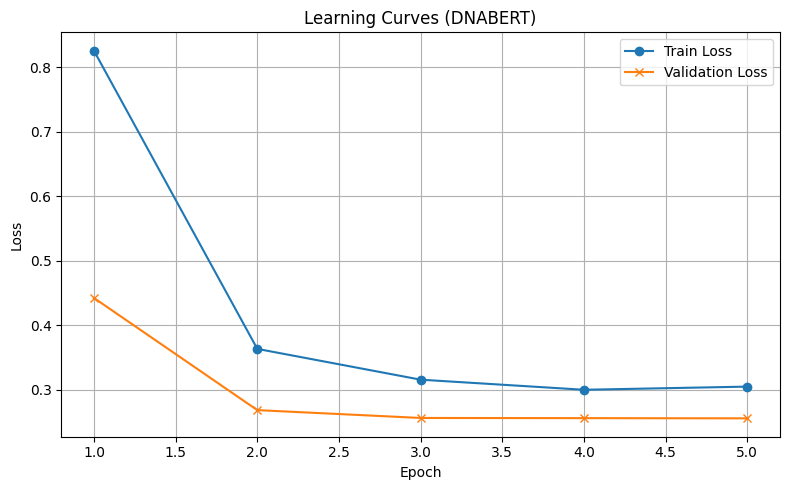

In [47]:
# Empty lists for the training and validation losses
train_losses = []
val_losses = []

# Initializing the training
for epoch in range(num_epochs): # running for every epoch
    model.train() # model set to training setting
    total_loss = 0 # storing the global loss in a single epoch
    print(f"\nStarting Epoch {epoch+1}/{num_epochs}")

    for batch_idx, batch in enumerate(train_loader): # going through all the batches
        # Moving everything to device
        ids = batch["ids"].to(device)
        labels = batch["labels"].to(device)
        segment_ids = torch.zeros_like(ids).to(device)

        optimizer.zero_grad() # clearing up the previous gradients
        outputs = model(ids, segment_ids) # forward passing the inputs
        loss = criterion(outputs.view(-1, num_classes), labels.view(-1)) # computing the losses
        loss.backward() # backpropagation
        optimizer.step() # updating the model weights with the optimizer

        batch_loss = loss.item() # batch loss
        total_loss += batch_loss # summing the loss

        print(f"Batch {batch_idx+1}/{len(train_loader)} - Loss: {batch_loss:.4f}")

    avg_train_loss = total_loss / len(train_loader) # computing training loss
    train_losses.append(avg_train_loss)


    # Validation
    model.eval()
    val_loss = 0 # storing the validation loss
    with torch.no_grad(): # No computation of the gradients in the validation
        for batch in test_loader: # Moving to device
            ids = batch["ids"].to(device)
            labels = batch["labels"].to(device)
            segment_ids = torch.zeros_like(ids).to(device)

            outputs = model(ids, segment_ids) # forward passing the inputs
            loss = criterion(outputs.view(-1, num_classes), labels.view(-1)) # computing the losses
            val_loss += loss.item() # cummulation of the losses

    avg_val_loss = val_loss / len(test_loader) # computing validation average losses
    val_losses.append(avg_val_loss) # appending the validation losses

    print(f"Epoch {epoch+1}/{num_epochs} completed - Train Loss: {avg_train_loss:.4f} - Val Loss: {avg_val_loss:.4f}")


# Saving the models

# torch.save(model.state_dict(), "Trained_DNABERT5.pt")
torch.save(model.state_dict(), "Trained_DNABERT4.pt")
# torch.save(model.state_dict(), "Trained_DNABERT3.pt")
# torch.save(model.state_dict(), "Trained_DNABERT6.pt")

# Plotting the training and validation losses
def plot_learning_curves(train_losses, val_losses, method="DNABERT"):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_losses, label="Train Loss", marker="o")
    plt.plot(epochs, val_losses, label="Validation Loss", marker="x")
    plt.title(f"Learning Curves ({method})")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_learning_curves(train_losses, val_losses, method="DNABERT")


In [48]:
# Load the saved models:

# model.load_state_dict(torch.load("Trained_DNABERT5.pt"))
model.load_state_dict(torch.load("Trained_DNABERT4.pt"))
# model.load_state_dict(torch.load("Trained_DNABERT3.pt"))
# model.load_state_dict(torch.load("Trained_DNABERT6.pt"))

# Model evaluation
model.eval()
# Initializing for predictions and labels
correct = 0
total = 0

with torch.no_grad(): # no need to compute the gradients
    for batch in test_loader: # going through all the batches in the test
        # Moving to device
        ids = batch["ids"].to(device)
        labels = batch["labels"].to(device)
        segment_ids = torch.zeros_like(ids).to(device)
        # Computing the outputs
        outputs = model(ids, segment_ids)
        predictions = torch.argmax(outputs, dim=-1)
        # Computing the correct predictions
        correct += (predictions == labels).sum().item()
        total += labels.numel()

# Model accuracy
accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")




Test Accuracy: 0.9308
